# Load and work with csv files
See [https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset](https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset)

In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [2]:
B_all = pd.read_csv('/Users/flint/Data/yelp/csv/business.csv', header=0)

In [3]:
B_all.shape

(174567, 12)

In [4]:
B_all.head(2)

,id,name,postal,street,lat,lon,stars,review,is_open,city_id,city_name,state
0,FYWN1wneV18bWNgQjJ2GNg,Dental by Design,85044,"4855 E Warner Rd, Ste B9",33.330690,-111.978599,4.0,22,True,D66C6A,Ahwatukee,AZ
1,He-G7vWjzVUysIKrfNbPUQ,Stephen Szabo Salon,15317,3101 Washington Rd,40.291685,-80.104900,3.0,11,True,60618F,McMurray,PA


In [8]:
conv = {'category': lambda x: x.upper()}

In [9]:
C_all = pd.read_csv('/Users/flint/Data/yelp/csv/yelp_incat.csv', converters=conv)

In [10]:
C_all.shape

(668022, 2)

In [11]:
C_all.head()

,business,category
0,mmazCP1ZH0QsUqDS6OivFA,SEAFOOD
1,Zh7k_33xMSPwm0UU7LsEIw,EDUCATION
2,EBa7-48XiJMmbbZ7VDhrjg,SHOPPING
3,IsUuk4HqkQaMPwpLGCHAtQ,HAIR EXTENSIONS
4,WrBArrXMBdQHcdfudhneGw,HOME SERVICES


## Explore data with pandas and matplotlib

## Compute a ranking of business per category
See [https://en.wikipedia.org/wiki/Bayesian_average](https://en.wikipedia.org/wiki/Bayesian_average)

See also [datetime conversion](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [12]:
import matplotlib.pyplot as plt

In [13]:
R_all = pd.read_csv('/Users/flint/Data/yelp/csv/review.csv')

In [14]:
R_all.shape

(307602, 4)

In [15]:
R_all.head()

,business,date,author,stars
0,ym5FOqL6tGbgynzwKMHZuw,2017-07-23,tKv1UeWDyEABNBrGhCfzUA,5
1,LCb2moBNkcBto_32rmZJ5A,2017-02-21,y2hYhjQECJG813jwNLnfKQ,3
2,ipFobdM6X_4SNMA9ZBfdAQ,2017-01-25,oZsYFsP7xBfcbO3CCmsNgQ,5
3,rnBm2hD9Y_RQ7LFo9S9AFA,2012-10-16,CWpVhVAzbkrHJK9_-KwIFQ,5
4,SAae44V24aD7y_HpgxjhPA,2017-06-10,DDMrvgE2Wz1IxStRtL5CYQ,3


## Count votes per business

In [16]:
A = R_all.groupby('business').agg({'stars': ['mean', 'count', 'std']})

In [17]:
A.head()

stars                
                            mean count       std
business                                        
--DaPTJW3-tB1vP-PfdTEg  3.666667    39  1.242521
--KCl2FvVQpvjzmZSPyviA  2.916667    12  1.564279
--Y7NhBKzLTbNliMUX_wfg  4.875000     8  0.353553
-0ZO00Vm2ADchytlEkoXmg  5.000000    68  0.000000
-0dWjxaPKrXAn8urSnkSLA  2.937500    32  1.242721

In [18]:
idx = pd.IndexSlice
stars_mean = A.loc[:,idx[:,'mean']]
stars_count = A.loc[:,idx[:,'count']]

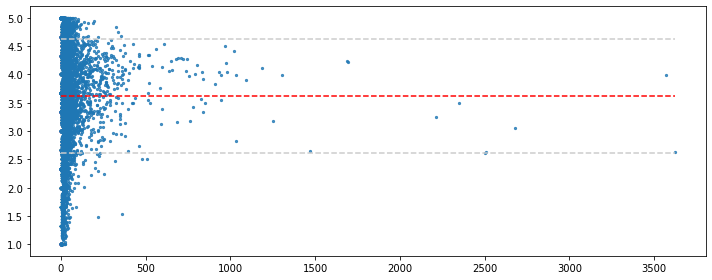

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(stars_count, stars_mean, alpha=0.8, s=5)
ax.plot([0, SC.max()], [SM.mean() + SM.std(), SM.mean() + SM.std()], color='#cccccc', linestyle='dashed')
ax.plot([0, SC.max()], [SM.mean(), SM.mean()], color='#ff0000', linestyle='dashed')
ax.plot([0, SC.max()], [SM.mean() - SM.std(), SM.mean() - SM.std()], color='#cccccc', linestyle='dashed')
plt.tight_layout()
plt.show()

In [22]:
stars_count.values

array([[39],
       [12],
       [ 8],
       ...,
       [ 5],
       [ 3],
       [ 9]])

In [20]:
SC = stars_count.values.ravel()
SM = stars_mean.values.ravel()

## Distribution of votes and number of votes

In [23]:
SCs, SMs = [], []
thr = 200
for i, x in enumerate(SC):
    if x >= thr:
        SCs.append(x)
        SMs.append(SM[i])

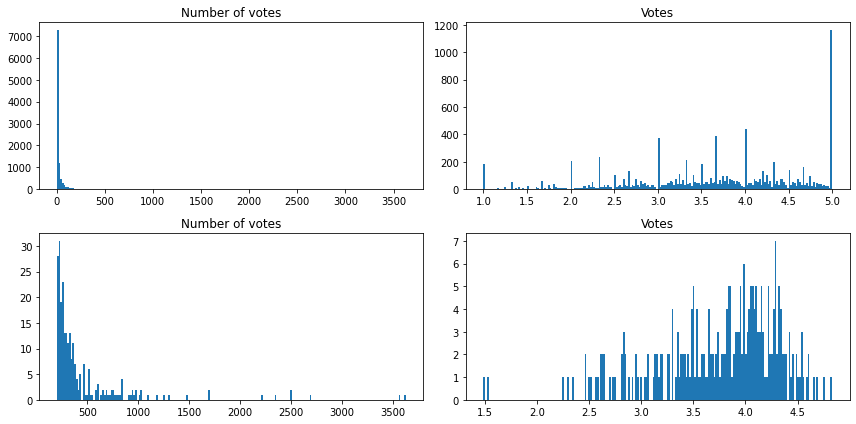

In [24]:
fig, ax = plt.subplots(figsize=(12, 6), ncols=2, nrows=2)
ax[0,0].hist(SC, bins=200)
ax[0,0].set_title('Number of votes')
ax[0,1].hist(SM, bins=200)
ax[0,1].set_title('Votes')
ax[1,0].hist(SCs, bins=200)
ax[1,0].set_title('Number of votes')
ax[1,1].hist(SMs, bins=200)
ax[1,1].set_title('Votes')
plt.tight_layout()
plt.show()

## Working with Pandas multindex

In [25]:
A.columns

MultiIndex([('stars',  'mean'),
            ('stars', 'count'),
            ('stars',   'std')],
           )

In [26]:
A.columns = A.columns.set_names(['l0', 'l1'])

In [27]:
A.columns

MultiIndex([('stars',  'mean'),
            ('stars', 'count'),
            ('stars',   'std')],
           names=['l0', 'l1'])

In [28]:
X = A.droplevel('l0', axis=1)

In [29]:
X.head()

l1,mean,count,std
business,,,
--DaPTJW3-tB1vP-PfdTEg,3.666667,39,1.242521
--KCl2FvVQpvjzmZSPyviA,2.916667,12,1.564279
--Y7NhBKzLTbNliMUX_wfg,4.875000,8,0.353553
-0ZO00Vm2ADchytlEkoXmg,5.000000,68,0.000000
-0dWjxaPKrXAn8urSnkSLA,2.937500,32,1.242721


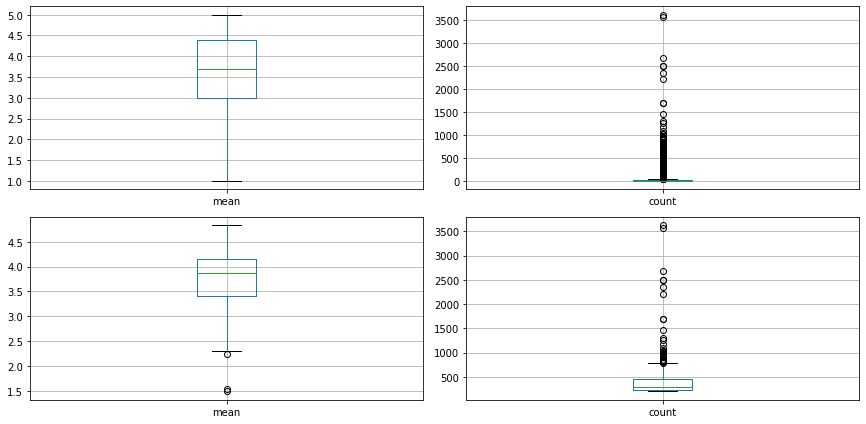

In [30]:
fig, ax = plt.subplots(figsize=(12, 6), ncols=2, nrows=2)
X.boxplot(column='mean', ax=ax[0,0])
X.boxplot(column='count', ax=ax[0,1])
X[X['count'] >= thr].boxplot(column='mean', ax=ax[1,0])
X[X['count'] >= thr].boxplot(column='count', ax=ax[1,1])
plt.tight_layout()
plt.show()

## Bayesian average

$$
\overline{x} = \frac{Cm + \sum\limits_{i=1}^{n} x_i}{C + n}
$$

with $C$ being a costant and $m$ a prior mean.

In [31]:
from collections import defaultdict

In [32]:
R_all.head()

,business,date,author,stars
0,ym5FOqL6tGbgynzwKMHZuw,2017-07-23,tKv1UeWDyEABNBrGhCfzUA,5
1,LCb2moBNkcBto_32rmZJ5A,2017-02-21,y2hYhjQECJG813jwNLnfKQ,3
2,ipFobdM6X_4SNMA9ZBfdAQ,2017-01-25,oZsYFsP7xBfcbO3CCmsNgQ,5
3,rnBm2hD9Y_RQ7LFo9S9AFA,2012-10-16,CWpVhVAzbkrHJK9_-KwIFQ,5
4,SAae44V24aD7y_HpgxjhPA,2017-06-10,DDMrvgE2Wz1IxStRtL5CYQ,3


In [35]:
data = defaultdict(list)
for i, row in R_all.iterrows():
    data[row['business']].append(row['stars'])

In [42]:
C, m = 300, R_all.stars.values.mean()
means = {}
for business, scores in data.items():
    x_ = (C * m + sum(scores)) / (C + len(scores))
    means[business] = x_

In [43]:
X['bayesian'] = [means[x] for x in X.index.values]

In [44]:
X.head()

l1,mean,count,std,bayesian
business,,,,
--DaPTJW3-tB1vP-PfdTEg,3.666667,39,1.242521,3.685686
--KCl2FvVQpvjzmZSPyviA,2.916667,12,1.564279,3.658486
--Y7NhBKzLTbNliMUX_wfg,4.875000,8,0.353553,3.718986
-0ZO00Vm2ADchytlEkoXmg,5.000000,68,0.000000,3.930564
-0dWjxaPKrXAn8urSnkSLA,2.937500,32,1.242721,3.615806


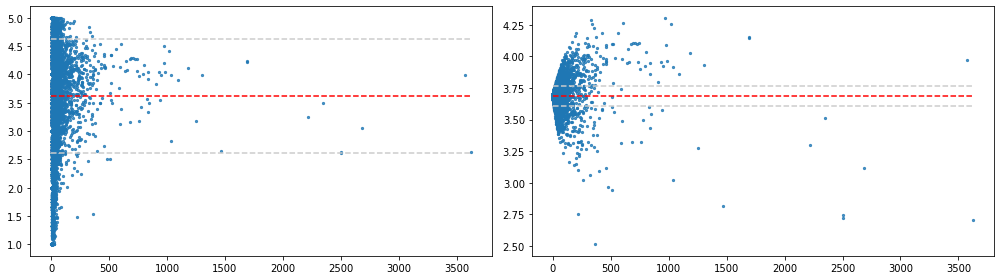

In [45]:
fig, ax = plt.subplots(figsize=(14, 4), ncols=2)
ax[0].scatter(stars_count, stars_mean, alpha=0.8, s=5)
ax[0].plot([0, SC.max()], [SM.mean() + SM.std(), SM.mean() + SM.std()], color='#cccccc', linestyle='dashed')
ax[0].plot([0, SC.max()], [SM.mean(), SM.mean()], color='#ff0000', linestyle='dashed')
ax[0].plot([0, SC.max()], [SM.mean() - SM.std(), SM.mean() - SM.std()], color='#cccccc', linestyle='dashed')
ax[1].scatter(X['count'], X.bayesian, alpha=0.8, s=5)
ax[1].plot([0, X['count'].max()], 
        [X.bayesian.mean() + X.bayesian.std(), X.bayesian.mean() + X.bayesian.std()], 
        color='#cccccc', linestyle='dashed')
ax[1].plot([0, X['count'].max()], [X.bayesian.mean(), X.bayesian.mean()], color='#ff0000', linestyle='dashed')
ax[1].plot([0, X['count'].max()], 
        [X.bayesian.mean() - X.bayesian.std(), X.bayesian.mean() - X.bayesian.std()], 
        color='#cccccc', linestyle='dashed')
plt.tight_layout()
plt.show()

In [47]:
A.to_excel('/Users/flint/Downloads/example_excel.xlsx')